# 課題：kaggle2『データセット名:Mushroom Classification』
###    問題設定：キノコを識別する
###    アルゴリズム：重回帰分析
###    分析環境(Windows10 64bit,Python 3.6.3,R3.3.1)
###    作成者：豊田

### ●kaggle
https://www.kaggle.com/uciml/mushroom-classification/data
### ●参考
### 形状や生息地等の特性からキノコが食用か有毒かを分類するデータセット
#### https://edu.deepanalytics.jp/datasets/19
##### https://archive.ics.uci.edu/ml/datasets/Mushroom

## ＜データセットの読み込み＞

In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyper
import seaborn as sns
import statsmodels.api as sm #線形回帰分析と同時にAICを計算
import itertools #組み合わせを求める
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split #トレーニングデータとテストデータに分ける
from sklearn.preprocessing import StandardScaler #データの標準化
from sklearn.model_selection import KFold #交差検証
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #回帰分析
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score #予測結果の識別率を算出

#CSVファイル読み込み
df_csv =pd.read_csv('mushrooms.csv')

## ＜欠測値・異常値の処理＞

In [538]:
#データ行数
print("データ行数 =",len(df_csv))

データ行数 = 8124


In [539]:
#欠損値の確認
pd.DataFrame(df_csv.isnull().sum(), columns=["num of missing"])

,num of missing
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


上記集計では欠損値NaNは確認されず

In [540]:
#その他の欠損値及び異常値の確認
for col in df_csv.columns:
    if col=="class":
        continue
    print(col)
    df_cross = pd.crosstab(index=df_csv["class"], columns=df_csv[col],margins=True)
    display(df_cross)

cap-shape


cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


cap-surface


cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


cap-color


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


bruises


bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


odor


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


gill-attachment


gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


gill-spacing


gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


gill-size


gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


gill-color


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


stalk-shape


stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


stalk-root


stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


stalk-surface-above-ring


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


stalk-surface-below-ring


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


stalk-color-above-ring


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


stalk-color-below-ring


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


veil-type


veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


veil-color


veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


ring-number


ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


ring-type


ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


spore-print-color


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


population


population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


habitat


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


上記クロス集計から
カラム”stalk-root”に”？”が2480個含まれていることを、カラム”veil-type”は”P”のみであることを確認。
カラム”stalk-root”の欠損値数が多いことから、欠損値の置換ではなく列削除にて対応。カラム”veil-type”も列削除。

In [541]:
#カラム”veil-type”を削除
del df_csv['stalk-root']
del df_csv['veil-type']
df_csv

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,s,w,w,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,s,w,w,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,s,w,w,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,s,w,w,w,o,p,k,s,m


## ＜データセットのキーの確認＞

In [542]:
print(df_csv.keys())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')


## ＜質的変数をダミー変数に変換＞

In [543]:
use_col = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape','stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

if len(use_col) == 1:
    dum_mushrooms = pd.get_dummies(df_csv[use_col[0]])
else:
    dum_mushrooms = pd.get_dummies(df_csv[use_col])  
display(dum_mushrooms.head())
display(dum_mushrooms.tail())

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## ＜ダミー変数変換後のデータセットキーの確認＞

In [544]:
print(dum_mushrooms.keys())

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=113)


## ＜説明変数選択検討＞

In [545]:
#相関の計算
display(dum_mushrooms.corr().sort_values(by='class_p').head())
display(dum_mushrooms.corr().sort_values(by='class_p').tail())
#相関係数の出力
dum_mushrooms.corr().to_csv('correlation.csv')

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class_e,1.000000,-1.000000,0.182567,-0.023007,-0.018526,-0.163565,0.060664,0.026886,0.195415,-0.023007,...,0.159572,-0.443722,0.107055,0.126123,0.165004,-0.155150,0.138627,-0.323346,-0.112078,0.150087
odor_n,0.785557,-0.785557,-0.000314,0.025332,0.066856,-0.098152,0.071775,-0.015817,0.286171,0.025332,...,-0.009620,-0.275386,0.136724,0.228838,0.089642,-0.086260,-0.121145,-0.326140,-0.076202,0.177576
ring-type_p,0.540469,-0.540469,0.237666,0.000514,-0.061414,-0.207080,0.064357,0.068457,0.062610,0.022715,...,0.173763,-0.203531,0.123061,0.245869,-0.056477,-0.167616,0.197609,-0.299297,0.222924,-0.152022
gill-size_b,0.540024,-0.540024,0.148449,-0.033174,0.075766,-0.306333,-0.093993,0.056995,0.257889,-0.033174,...,0.119577,-0.506475,0.298685,0.016064,0.323808,-0.336217,0.129183,-0.170190,-0.141152,0.104090
bruises_t,0.501530,-0.501530,0.115686,0.003803,0.045188,-0.229578,-0.053026,0.048557,-0.028808,0.026321,...,0.072997,-0.179268,0.162030,0.264457,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
gill-size_n,-0.540024,0.540024,-0.148449,0.033174,-0.075766,0.306333,0.093993,-0.056995,-0.257889,0.033174,...,-0.119577,0.506475,-0.298685,-0.016064,-0.323808,0.336217,-0.129183,0.170190,0.141152,-0.104090
stalk-surface-below-ring_k,-0.573524,0.573524,-0.095534,-0.013965,0.023582,0.091324,-0.039566,-0.029014,0.037508,-0.013965,...,-0.213523,0.200032,0.108791,-0.096854,-0.020547,0.046874,-0.121488,0.310553,-0.137052,-0.097890
stalk-surface-above-ring_k,-0.587658,0.587658,-0.089730,-0.014253,0.019832,0.102231,-0.040383,-0.034533,0.035135,-0.014253,...,-0.219524,0.197322,0.098339,-0.072873,-0.031407,0.040251,-0.123995,0.300420,-0.139879,-0.099910
odor_f,-0.623842,0.623842,-0.146074,-0.013357,0.083449,-0.025921,-0.037845,0.006691,0.019221,-0.013357,...,-0.145122,0.163744,0.131725,-0.121806,0.003091,-0.026843,-0.116202,0.256188,0.061839,-0.093630
class_p,-1.000000,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087


＜目的変数＞　class_p（毒キノコ）毒キノコか否かを識別

＜説明変数＞　
以下は、class_pとの相関（絶対値）が高い項目
    #odor_f                       臭気＝ファウル（ひどい、腐敗）  0.623842
    #stalk-surface-above-ring_k　 柄-表面上のリング＝絹毛　　　　 0.587658
    #stalk-surface-below-ring_k　 柄-表面下のリング＝絹毛　　     0.573524    
    #gill-size_n　                ひだのサイズ＝狭い　　　　　 　 0.540024
    #odor_n                       臭気＝なし 　　　　　　　　　　-0.785557
    #ring-type_p                  つばの種類＝垂れた             -0.540469
    #gill-size_b                  ひだのサイズ＝広い　　　　　　 -0.540024
    #bruises_t                    斑点＝なし                     -0.501530
    

In [546]:
#目的変数と説明変数のみのデータフレームを作成
y_var = "class_p"
X_var = ["odor_f","stalk-surface-above-ring_k","stalk-surface-below-ring_k","gill-size_n","odor_n","ring-type_p","gill-size_b","bruises_t"]

df = dum_mushrooms[[y_var]+ X_var]
display(df.head())
display(df.tail())

,class_p,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,gill-size_n,odor_n,ring-type_p,gill-size_b,bruises_t
0,1,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,1,1,1
3,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,1,0


,class_p,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,gill-size_n,odor_n,ring-type_p,gill-size_b,bruises_t
8119,0,0,0,0,0,1,1,1,0
8120,0,0,0,0,0,1,1,1,0
8121,0,0,0,0,0,1,1,1,0
8122,1,0,0,1,1,0,0,0,0
8123,0,0,0,0,0,1,1,1,0


<相関マトリクス>


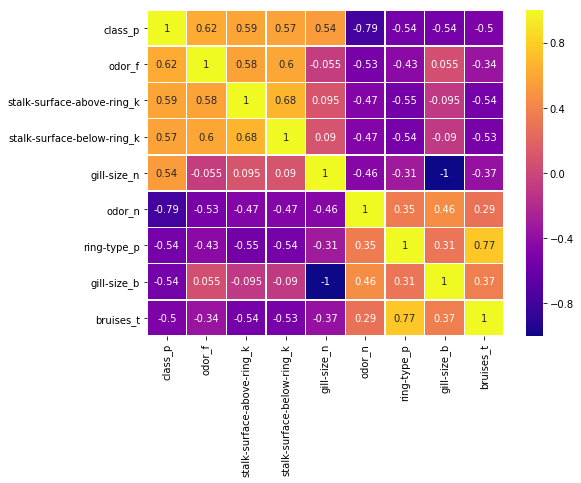

In [547]:
import seaborn as sns
%matplotlib inline 
print('<相関マトリクス>')
plt.figure(figsize=(8, 6)) #heatmap size
sns.heatmap(df.corr(), annot=True, cmap='plasma', linewidths=.5) # annot:値表示/非表示 linewidths: しきり線

In [548]:
#print('<散布図>')
#pd.plotting.scatter_matrix(df, figsize=(15,15))
#plt.show()

C:\Users\yt690\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


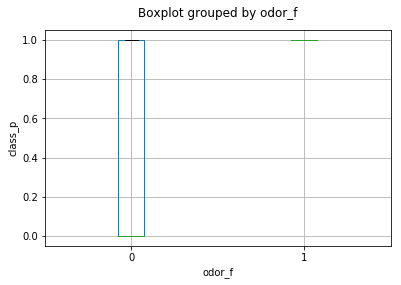

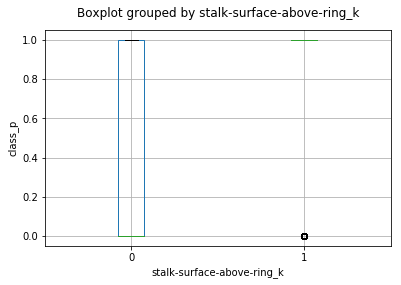

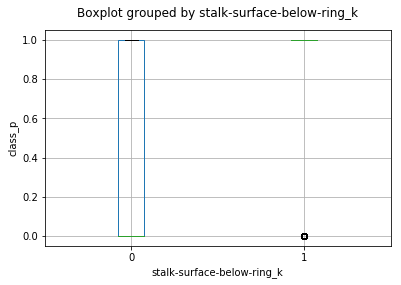

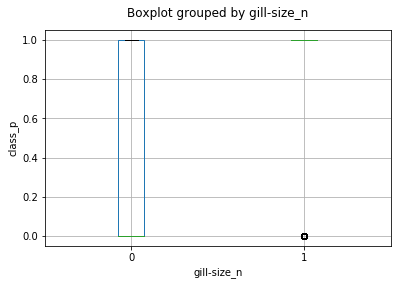

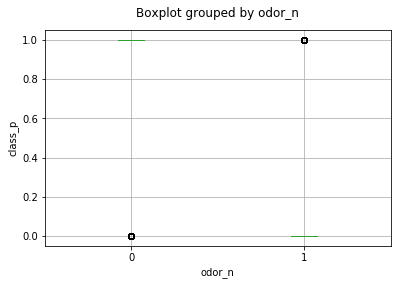

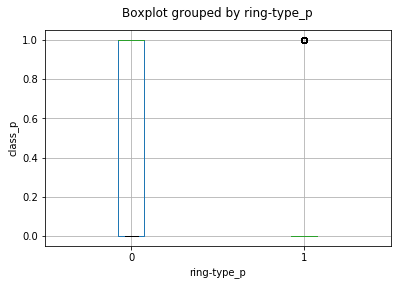

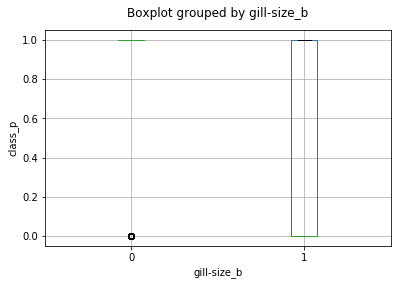

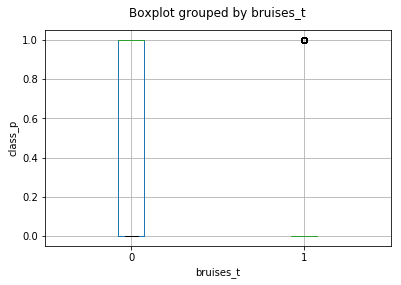

In [549]:
#箱ひげ
df.boxplot(column="class_p",by="odor_f")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="stalk-surface-above-ring_k")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="stalk-surface-below-ring_k")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="gill-size_n")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="odor_n")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="ring-type_p")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="gill-size_b")
plt.title("")
plt.ylabel("class_p")
plt.show()

df.boxplot(column="class_p",by="bruises_t")
plt.title("")
plt.ylabel("class_p")
plt.show()

#odor_f                       臭気＝ファウル（ひどい、腐敗）  
#stalk-surface-above-ring_k　 柄-表面上のリング＝絹毛　　　　 
#stalk-surface-below-ring_k　 柄-表面下のリング＝絹毛　　         
#gill-size_n　                ひだのサイズ＝狭い　　　　　 　 
#odor_n                       臭気＝なし 　　　　　　　　　　
#ring-type_p                  つばの種類＝垂れた             
#gill-size_b                  ひだのサイズ＝広い　　　　　　 
#bruises_t                    斑点＝なし                     

In [550]:
#多重共線性
from sklearn.linear_model import LinearRegression
dfd = df.drop(["class_p"],axis=1)
for cname in dfd.columns:  
    y=dfd[cname]
    X=dfd.drop(cname, axis=1)

    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y) # 決定係数R^2
    print(cname,":" ,1/(1-np.power(rsquared,2)))

odor_f : 1.44582319839726
stalk-surface-above-ring_k : 1.4809205459342956
stalk-surface-below-ring_k : 1.4873657419600335
gill-size_n : inf
odor_n : 1.4854409838104028
ring-type_p : 1.6652554145910445
gill-size_b : inf
bruises_t : 1.7782421902894971


C:\Users\yt690\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


#### VIF10以上なしの為、選択変数に多重共線性は見られない

In [551]:
#Rを用いた変数選択(ステップワイズ法)
import pyper #pyperとRを事前にインストールしておく必要がある
r = pyper.R(use_pandas='True')
r.assign('df', df)# Rへデータ渡す
print(r("step(lm(class_p~.,data=df))")) # Rのコマンド実行

try({step(lm(class_p~.,data=df))})
Start:  AIC=-24805.48
class_p ~ odor_f + stalk.surface.above.ring_k + stalk.surface.below.ring_k + 
    gill.size_n + odor_n + ring.type_p + gill.size_b + bruises_t


Step:  AIC=-24805.48
class_p ~ odor_f + stalk.surface.above.ring_k + stalk.surface.below.ring_k + 
    gill.size_n + odor_n + ring.type_p + bruises_t

                             Df Sum of Sq    RSS    AIC
<none>                                    382.70 -24806
- bruises_t                   1     0.110 382.81 -24805
- ring.type_p                 1     2.470 385.17 -24755
- stalk.surface.below.ring_k  1     3.762 386.46 -24728
- stalk.surface.above.ring_k  1    13.101 395.80 -24534
- odor_n                      1    96.270 478.97 -22985
- odor_f                      1    97.345 480.04 -22966
- gill.size_n                 1   141.809 524.51 -22247

Call:
lm(formula = class_p ~ odor_f + stalk.surface.above.ring_k + 
    stalk.surface.below.ring_k + gill.size_n + odor_n + ring.type_p + 
   

#### ステップワイズ法による変数選択は
    #odor_f                       臭気＝ファウル（ひどい、腐敗）  
    #stalk-surface-above-ring_k　 柄-表面上のリング＝絹毛　　　　 
    #stalk-surface-below-ring_k　 柄-表面下のリング＝絹毛　　         
    #gill-size_n　                ひだのサイズ＝狭い　　　　　 　 
    #odor_n                       臭気＝なし 　　　　　　　　　　
    #ring-type_p                  つばの種類＝垂れた             　　　　 
    #bruises_t                    斑点＝なし  
    
    ※gill-size_b（ひだのサイズ＝広い）が選択されず　　
    

In [552]:
#全ての組み合わせを試す
import statsmodels.api as sm #線形回帰分析と同時にAICを計算
import itertools #組み合わせを求める
count = 1
for i in range(8):
    combi = itertools.combinations(df.drop("class_p",axis=1).columns, i+1) #組み合わせを求める


    for v in combi:
        y = df["class_p"]
        X = sm.add_constant(df[list(v)])
        model = sm.OLS(y, X).fit()
        if count == 1:
            min_aic = model.aic
            min_var = list(v)
        if min_aic > model.aic:
            min_aic = model.aic
            min_var = list(v)
        count += 1
        print("AIC:",round(model.aic), "変数:",list(v))
print("====minimam AIC====")
print(min_var,min_aic)

AIC: 7781.0 変数: ['odor_f']
AIC: 8344.0 変数: ['stalk-surface-above-ring_k']
AIC: 8546.0 変数: ['stalk-surface-below-ring_k']
AIC: 8985.0 変数: ['gill-size_n']
AIC: 3987.0 変数: ['odor_n']
AIC: 8980.0 変数: ['ring-type_p']
AIC: 8985.0 変数: ['gill-size_b']
AIC: 9432.0 変数: ['bruises_t']
AIC: 6709.0 変数: ['odor_f', 'stalk-surface-above-ring_k']
AIC: 6916.0 変数: ['odor_f', 'stalk-surface-below-ring_k']
AIC: 1437.0 変数: ['odor_f', 'gill-size_n']
AIC: 2583.0 変数: ['odor_f', 'odor_n']
AIC: 6462.0 変数: ['odor_f', 'ring-type_p']
AIC: 1437.0 変数: ['odor_f', 'gill-size_b']
AIC: 6439.0 変数: ['odor_f', 'bruises_t']
AIC: 7607.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']
AIC: 4706.0 変数: ['stalk-surface-above-ring_k', 'gill-size_n']
AIC: 2541.0 変数: ['stalk-surface-above-ring_k', 'odor_n']
AIC: 7458.0 変数: ['stalk-surface-above-ring_k', 'ring-type_p']
AIC: 4706.0 変数: ['stalk-surface-above-ring_k', 'gill-size_b']
AIC: 7734.0 変数: ['stalk-surface-above-ring_k', 'bruises_t']
AIC: 4938.0 変数: ['stalk-surfa

AIC: 372.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'odor_n']
AIC: 3614.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'ring-type_p']
AIC: 3688.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'gill-size_b']
AIC: 3675.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'bruises_t']
AIC: 1506.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'odor_n', 'ring-type_p']
AIC: 372.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'odor_n', 'gill-size_b']
AIC: 1456.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'odor_n', 'bruises_t']
AIC: 3614.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_b']
AIC: 7003.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'ring-type_p', 'bruises_t']
AIC: 3675.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-bel

AIC: 4578.0 変数: ['stalk-surface-below-ring_k', 'gill-size_n', 'ring-type_p', 'gill-size_b', 'bruises_t']
AIC: 550.0 変数: ['stalk-surface-below-ring_k', 'odor_n', 'ring-type_p', 'gill-size_b', 'bruises_t']
AIC: 1204.0 変数: ['gill-size_n', 'odor_n', 'ring-type_p', 'gill-size_b', 'bruises_t']
AIC: -1750.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'odor_n', 'ring-type_p']
AIC: -1652.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'odor_n', 'gill-size_b']
AIC: -1700.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'odor_n', 'bruises_t']
AIC: 135.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'ring-type_p', 'gill-size_b']
AIC: 70.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'ring-type_p', 'bruises_t']
AIC: 113.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface

#### 変数選択はステップワイズ法と同じ        

## ＜クロスバリデーション(交差検定)＞

In [553]:
#予測性能を評価するにあたり、検討に利用できるデータセットを学習用データとテスト用データにわける。
#交差検証を行うと、データセットの全てを用いた評価を行える。
#回帰問題の評価指標は、MSE、RSME、MAEなど。
y = df["class_p"].values
#上記、検証結果を踏まえ、説明変数候補から”gill-size_b”を除外
X = df[['odor_f','stalk-surface-above-ring_k','stalk-surface-below-ring_k','gill-size_n','odor_n','ring-type_p','bruises_t']].values

#交差検証分割設定
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
kf = KFold(n_splits=5, random_state=1234, shuffle=True)
kf.get_n_splits(X, y)


df_result = pd.DataFrame()

for train_index, test_index in kf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #データの標準化
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    stdsc.mean_,stdsc.scale_
    
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train_std, y_train)
    print("決定係数=",regr.score(X_train_std, y_train))
    y_pred = regr.predict(X_test_std)
  
    thhd = 0.50000
    for i in range(len(y_pred)):
        if y_pred[i] >= thhd:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
    df_result = pd.concat([df_result, df], axis=0)
    
# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )
  
#Output
np.savetxt('result.csv',df_result, delimiter=',', header=",y_pred,y_test")

決定係数= 0.8162342942828031
決定係数= 0.8119380420356874
決定係数= 0.810703257459096
決定係数= 0.8087259295356375
決定係数= 0.8092158227761358
MSE=0.023
RMSE=0.15
MAE=0.023


C:\Users\yt690\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [554]:
#予測結果の識別率を算出
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("0:食用キノコ　1：毒キノコ Precision:適合率(精度) recall:再現率 f1-score:適合率と再現率の調和平均")
print("毒キノコ識別率：", accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      4208
          1       0.98      0.98      0.98      3916

avg / total       0.98      0.98      0.98      8124

0:食用キノコ　1：毒キノコ Precision:適合率(精度) recall:再現率 f1-score:適合率と再現率の調和平均
毒キノコ識別率： 0.9773510585918267


[[4112   96]
 [  88 3828]]


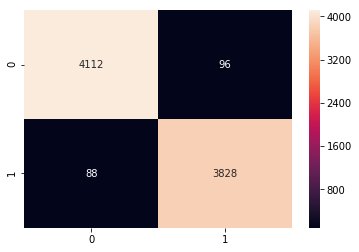

In [555]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
plt.show()

##### 食用キノコ4208のうち、毒キノコと識別された数96
##### 毒キノコ3916のうち、食用キノコと識別された数88